# CS-GY 6313 / CUSP-GX 6006: Data Visualization - Spring '24
# Homework #3: Temporal Visualization

In this homework, you will be working with visualizations of stock data. To achieve this, we'll be using [``pandas``](https://pandas.pydata.org/docs/user_guide/10min.html) to get the specific information we want (e.g. closing price) from four datasets we've aggregated in the `datasets/` directory. We'll provide example code on how to load in the required data, but your task is to complete the code.

## Imports

**Don't modify this code**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Importing from dataset file

Below is a helper function that imports raw data from the url provided, performs some pre-processing to change the date format into DateTime, and returns the final dataframe. Feel free to use this helper function in your code implementation.

Below is an example of using the helper function to import the stock data from `./datasets/amzn.csv`:

In [2]:
def import_df(filename):
    df = pd.read_csv(filename)
    df['dates'] = pd.to_datetime(df['dates'], format='%Y-%m-%d')
    return df

example_df = import_df("./datasets/amzn.csv")

Now that you have the dates and closing prices of AMZN in a dataframe, you can plot! Remember that you can access and plot a specific column of a dataframe with the following code logic:

```
x = df['x_axis']
y = df['y_axis']
plt.plot(x, y)
```

Below is an example using Amazon's raw stock data.

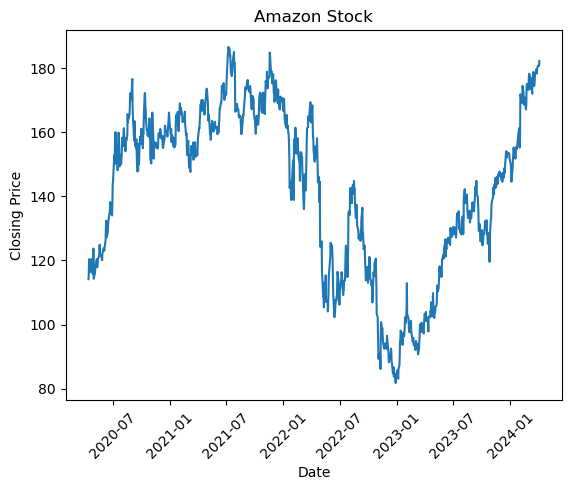

In [9]:
# Plot the dates vs. closing price for AMZN
fig = plt.figure()
plt.plot(example_df['dates'], example_df['closing price'])

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title("Amazon Stock")
plt.show()

## Part 1: Curve-Based Visualization (5/15 points)

Temporally visualize the closing prices for the 1000 trading days of the 4 stocks as well as the mean (average) closing price across all 4 stocks for each day. Make sure to visualize all data in a single diagram. Color-code the plot so that each stock has a different color. Add a legend to let us know which plot represents which stock/data. An example is provided below:

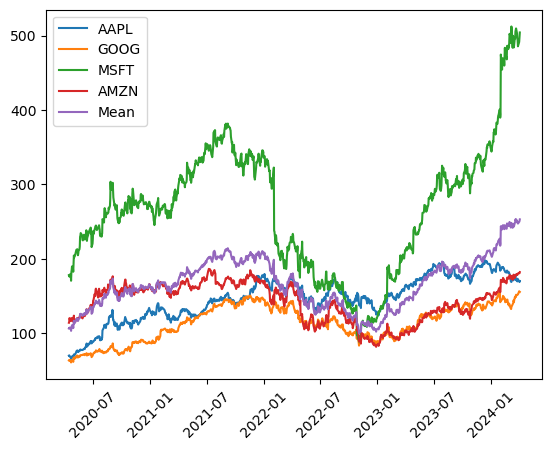

In [10]:
# Part 1: Closing price of at least 4 stocks + the mean (or average) of those four stocks for the past 1000 trading days

# Import the data
aapl_df = import_df("./datasets/aapl.csv")
goog_df = import_df("./datasets/goog.csv")
meta_df = import_df("./datasets/meta.csv")

# Calculate the mean of the closing prices
mean_df = pd.DataFrame()
mean_df['dates'] = aapl_df['dates']
mean_df['closing price'] = (aapl_df['closing price'] + goog_df['closing price'] + meta_df['closing price'] + example_df['closing price']) / 4

# Plot all the closing prices
fig = plt.figure()
plt.plot(aapl_df['dates'], aapl_df['closing price'], label='AAPL')
plt.plot(goog_df['dates'], goog_df['closing price'], label='GOOG')
plt.plot(meta_df['dates'], meta_df['closing price'], label='MSFT')
plt.plot(example_df['dates'], example_df['closing price'], label='AMZN')
plt.plot(mean_df['dates'], mean_df['closing price'], label='Mean')
plt.xticks(rotation=45)
# show the legend
plt.legend()




## Part 2: Stacked Area Visualization (7/15 points)

Your task here is to plot two different plots. The first plot is the _stacked area chart_ of the _volumes_ of the 4 stocks. The second plot is the same, except you need to plot the _**percentage** stacked area chart_. To achieve the latter, you will need to find the percentages of the total volume for each of your stocks on each day.

Make sure to color-code your area plots so that it's easy to distinguish the stocks, and add a legend to help us identify which data represents which stock. There is no need to visualize the mean data here.

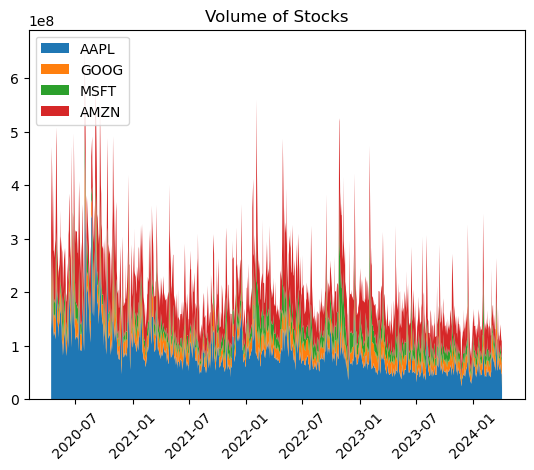

In [19]:
# Part 2: Both normal and percentage stacked area charts of the volume of the stocks for the past 1000 trading days

# Retrieve the volume data
volume_df = pd.DataFrame()
volume_df['dates'] = aapl_df['dates']  
volume_df['AAPL'] = aapl_df['volume']
volume_df['GOOG'] = goog_df['volume']
volume_df['MSFT'] = meta_df['volume']
volume_df['AMZN'] = example_df['volume']

# Plot the normal stacked area chart
fig = plt.figure()
plt.stackplot(volume_df['dates'], volume_df['AAPL'], volume_df['GOOG'], volume_df['MSFT'], volume_df['AMZN'], labels=['AAPL', 'GOOG', 'MSFT', 'AMZN'])
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Volume of Stocks')
plt.show()



In [20]:
#  calculate the percentage of the volume of the stocks
percentage_volume_df = pd.DataFrame()

# get the total volume of the stocks for each day
percentage_volume_df['dates'] = volume_df['dates']
percentage_volume_df['total'] = volume_df['AAPL'] + volume_df['GOOG'] + volume_df['MSFT'] + volume_df['AMZN']

# calculate the percentage of the volume of the stocks
percentage_volume_df['AAPL'] = volume_df['AAPL'] / percentage_volume_df['total'] * 100
percentage_volume_df['GOOG'] = volume_df['GOOG'] / percentage_volume_df['total'] * 100
percentage_volume_df['MSFT'] = volume_df['MSFT'] / percentage_volume_df['total'] * 100
percentage_volume_df['AMZN'] = volume_df['AMZN'] / percentage_volume_df['total'] * 100


percentage_volume_df.head()



,dates,total,AAPL,GOOG,MSFT,AMZN
0,2020-04-14,427158600,45.649274,11.566664,4.918969,37.865093
1,2020-04-15,319343400,41.070021,10.469607,5.455882,43.004490
2,2020-04-16,471844400,33.300215,10.673434,5.000208,51.026143
3,2020-04-17,433804800,49.619091,8.985608,4.835078,36.560222
4,2020-04-20,295449900,44.005837,11.477411,5.452938,39.063814


In [21]:
# print the range of values for each column from smallest to largest
for column in percentage_volume_df.columns:
    print(f"{column}: {percentage_volume_df[column].min()} - {percentage_volume_df[column].max()}")


dates: 2020-04-14 00:00:00 - 2024-04-03 00:00:00
total: 41267875 - 657849900
AAPL: 15.967517857142857 - 74.45462021745153
GOOG: 5.741252317024306 - 38.27029861434492
MSFT: 3.4222870425472216 - 44.23909340522799
AMZN: 15.751427072509246 - 64.36004841082553


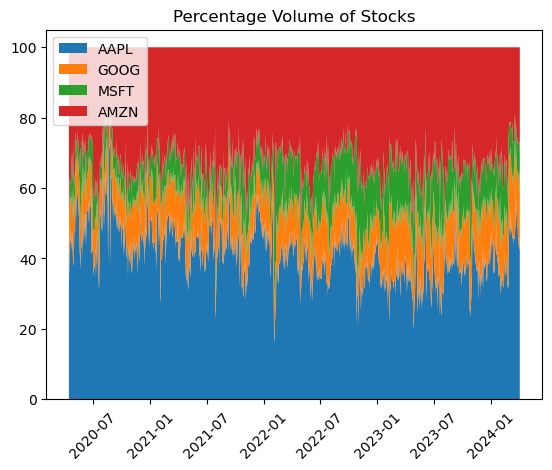

In [23]:
# Plot the percentage stacked area chart
fig = plt.figure()
plt.stackplot(percentage_volume_df['dates'], percentage_volume_df['AAPL'], percentage_volume_df['GOOG'], percentage_volume_df['MSFT'], percentage_volume_df['AMZN'], labels=['AAPL', 'GOOG', 'MSFT', 'AMZN'])
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.title('Percentage Volume of Stocks')
plt.show()

In [24]:
# determine which stock has the highest volume on average

# calculate the average volume for each stock
apple_avg_percentage = percentage_volume_df['AAPL'].mean()
google_avg_percentage = percentage_volume_df['GOOG'].mean()
meta_avg_percentage = percentage_volume_df['MSFT'].mean()
amazon_avg_percentage = percentage_volume_df['AMZN'].mean()

# print the average volume for each stock
print(f"AAPL: {apple_avg_percentage}")
print(f"GOOG: {google_avg_percentage}")
print(f"MSFT: {meta_avg_percentage}")
print(f"AMZN: {amazon_avg_percentage}")


AAPL: 41.58368538699493
GOOG: 13.316405357524745
MSFT: 11.867512055952927
AMZN: 33.232397199527405


In [25]:
# which stock won the most trading days in terms of volume

# initialize the counters
apple_count = 0
google_count = 0
meta_count = 0
amazon_count = 0

# iterate through the rows
for index, row in percentage_volume_df.iterrows():
    # determine which stock has the highest volume
    if row['AAPL'] > row['GOOG'] and row['AAPL'] > row['MSFT'] and row['AAPL'] > row['AMZN']:
        apple_count += 1
    elif row['GOOG'] > row['AAPL'] and row['GOOG'] > row['MSFT'] and row['GOOG'] > row['AMZN']:
        google_count += 1
    elif row['MSFT'] > row['AAPL'] and row['MSFT'] > row['GOOG'] and row['MSFT'] > row['AMZN']:
        meta_count += 1
    elif row['AMZN'] > row['AAPL'] and row['AMZN'] > row['GOOG'] and row['AMZN'] > row['MSFT']:
        amazon_count += 1

# print the number of trading days each stock won
print(f"AAPL: {apple_count}")
print(f"GOOG: {google_count}")
print(f"MSFT: {meta_count}")
print(f"AMZN: {amazon_count}")

AAPL: 759
GOOG: 2
MSFT: 8
AMZN: 231


## Part 3: Meaning behind the Data? (2/15 points)

Within 2-5 sentences for each, answer the following:

1. Do you notice any trends in the closing prices of each company's stock? What might these patterns indicate regarding the performance of these tech companies? (1 point)

In the curve-based visualization, it is apparent that, generally, Microsoft's stock had the highest closing price most of the time compared to all other stocks. It's interesting to observe how, despite the differences in prices, there are similar trends across all stock prices: when one experiences a dip, the others tend to follow suit, and when there's an uptick, most prices rise as well. This suggests that aggregate indexes, like the S&P 500, are meaningful, and since all these are tech stocks, it makes sense that they show similar overarching trends and patterns. This is further reinforced by the mean average price of all stocks visualization. The stacked chart of volumes, without normalization, offers very limited insight to me, except that Amazon and Apple stocks constitute most of the trade volume. The percentage stacked chart clarifies that Apple performs the best. Moreover, color plays a crucial role; for instance, Amazon's stock being red stands out to me, which could lead to the incorrect impression that Amazon is the top-performing stock.

2. Who occupies the biggest volume percentage across the four companies? What does this tell you about the performance of these tech companies? (1 point)

Apple holds the largest volume percentage, a fact I determined by tallying the number of days it led in the provided data in the cells above. This dominance in trading volume often reflects a company's market influence. However, despite Apple's prominence, it doesn't lead every day, indicating significant market fluctuations worth noting. Amazon, the second most dominant in terms of volume, offers a diverse range of products in cloud computing and e-commerce, suggesting its competitive stance in the market and hinting at a possible future where it can dominate. 

Feel free to write down your analyses inside this notebook or as a standalone document.